## Introduction

Joseph Fourier provided the mathematics to understand what Newton proposed in Physics. Fourier proposes the composition of any well-behaved function into a sum of harmonic function sine and cosine. 

Sine and Cosine appears to be the Eigen Function of heat.

## The Fourier Basis for $\mathbb{C}^N$

The set of $N$ signals in $\mathbb{C}^N$ $\omega_k[n] = e^{j\frac{2\pi}{N}nk}$ for $n, k = 0, 1, \cdots, N-1$ is an orthogonal basis in $\mathbb{C}^N$

Proof of orthgonality:

$$
\begin{equation}
\begin{split}
\langle \omega^{(k)}, \omega^{(h)} \rangle &= \sum_{n=0}^{N-1}(e^{j\frac{2\pi}{N}kn})* e^{j\frac{2\pi}{N}hn}\\
&= \sum_{n=0}^{N-1}(e^{j\frac{2\pi}{N}(h-k)n})\\
&= \left\{ \begin{array}{11}
N & \mbox{for } h = k \\
\frac{1-e^{j2\pi(h-k)}}{1-e^{j\frac{2\pi}{N}(h-k)}} = 0 & otherwise
\end{array} \right.
\end{split}
\end{equation}
$$


## DFT (Discreet Fourier Transform)

#### Analysis formula $X_k = \langle \omega^{(k)}, x \rangle$

$$X[k] = \sum_{n=0}^{N-1}x[n] e^{-j\frac{2\pi}{N}nk}, k = 0,1,\cdots,N-1$$

#### Synthesis $ x = \frac{1}{N}\sum_{k=0}^{N-1}X_k \omega^{(k)}$

$$ x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k] e^{j\frac{2\pi}{N}nk}$$

#### Matrix/vector representation of the DFT:

$$ \mathbf{U} = \frac{1}{\sqrt{N}}\left [exp \left (j\frac{2\pi}{N}nk \right )\right ]_{n \in \{0,N-1\}, k \in \{0, N-1\}} $$

where $n$ counts rows through the number of samples and $k$ indexes the discrete frequencies as columns.

The following figure shows the discrete frequencies on the unit circle and their corresponding real and imaginary parts that are the columns of $\mathbf{U}$

Analysis formula

$$ X = Ux $$

Synthesis formula

$$ x = \frac{1}{N} U^H X $$

where $U^H$ is the Hermitan transpose of matrix $U$.

In [1]:
%pylab inline

def dftmatrix(N):
    a = np.expand_dims(np.arange(N), 0)
    WN = np.exp(-2j*np.pi*a.T*a/N)
    return WN

Populating the interactive namespace from numpy and matplotlib


We could obtain the dftmatrxi using defined functions:

## DFT for some functions

Let's calculate dft transform for several functions. 

### The DFT of  $\delta$ function

$$ \delta [n] = \left\{ \begin{array}{11} 
        1 & \mbox{if } n = 0 \\
        0 & \mbox{if } n \not= 0
   \end{array}
\right. $$

(-0.5, 3)

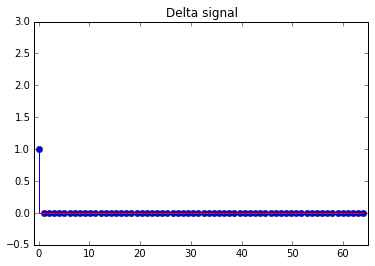

In [2]:
N = 64
x = linspace(0, N, N)
delta_func = vectorize(lambda n: 1 if (n == 0) else 0)
stem(x, delta_func(x))
title('Delta signal')
xlim([-1,65])
ylim([-.5, 3])

Transform $\delta [n]$ in analysis part could be calculate as follows:

[-1, 65, -0.5, 3]

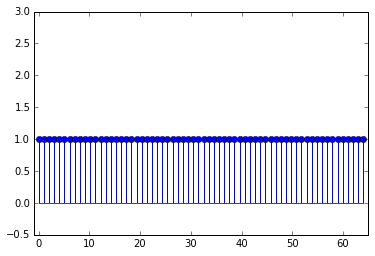

In [3]:
M = dftmatrix(N)
dft_delta = dot(M, delta_func(x))
stem(x, abs(dft_delta))
axis([-1, 65, -0.5, 3])

Error: 5.891079929197043e-14
(This small error is due to machine precision.)


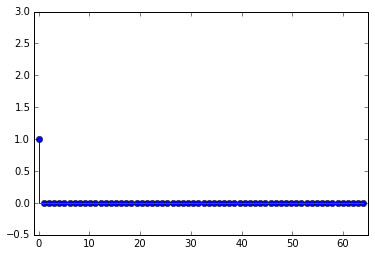

In [4]:
inverse_dft_delta = 1./N*dot(M.T.conjugate(), dft_delta)
stem(x, abs(inverse_dft_delta))
axis([-1, 65, -0.5, 3])
error = abs(delta_func(x) - inverse_dft_delta).sum()
print('Error: {0}'.format(error))
print('(This small error is due to machine precision.)')

### The DFT of the cosine function $x[n] = 3cos(2\pi n/16)$

[-1, 65, -3, 3]

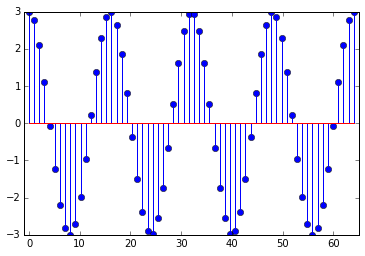

In [5]:
y = 3*cos(2*pi/16 * x)
stem(x, y)
axis([-1, 65, -3, 3])

The DFT of the above function is:

(0, 65)

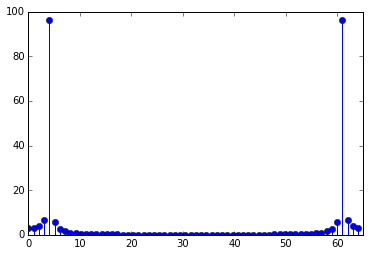

In [6]:
Y = dot(M, y)
stem(x, abs(Y))
xlim([0, 65])

We can observe that the plot result is similar to the result we calculate in theory

$$ \begin{equation} \begin{split}
x[n] &= 3cos \left(\frac{2\pi n}{16} \right) \\
&= 3cos \left(\frac{2\pi}{64}4n \right) \\
&= \frac{3}{2} \left[ e^{j\frac{2\pi}{64}4n} + e^{-j\frac{2\pi}{64}4n} \right] \\
&= \frac{3}{2} \left[ e^{j\frac{2\pi}{64}4n} + e^{j\frac{2\pi}{64}60n} \right] \\
&= \frac{3}{2}\left(w_4[n] + w_{64}[n] \right)
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
X[k] &= \langle w_k[n], x[n] \rangle \\
&= \langle x_k[n], \frac{3}{2}\left( w_4[n] + w_{60}[n] \right) \rangle \\
&= \frac{3}{2} \langle w_k[n], w_4[n] \rangle + \frac{3}{2} \langle w_4[n], w_{60}[n] \rangle \\
&= \left\{ \begin{array}{11}
    96 & \mbox{for } k = 4, 60 \\
    0 & \mbox{otherwise}
  \end{array} \right.
\end{split}
\end{equation}
$$

### The DFT of the cosine function $x[n] = 3cos(2\pi/16n + \pi/3)$

(0, 65)

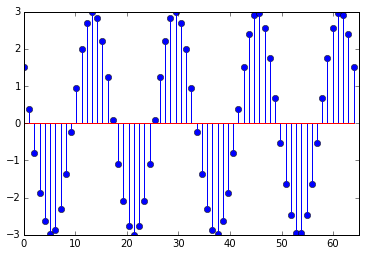

In [7]:
y2 = 3*cos(2*pi*x/16+pi/3)
stem(x, y2)
xlim([0,65])

The DFT of the above function is:

(0, 65)

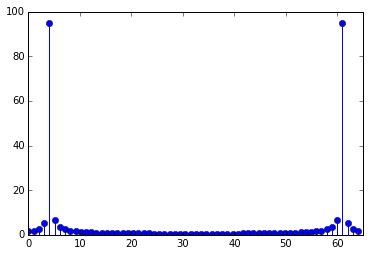

In [8]:
Y2 = dot(M, y2)
stem(x, abs(Y2))
xlim([0, 65])

### The DFT of the cosine function $x[n] = 3cos(2\pi/10n)$

(0, 65)

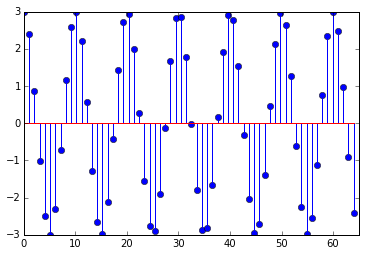

In [9]:
y3 = 3*cos(2*pi*x/10)
stem(x, y3)
xlim([0,65])

The DFT of the above function is:

(0, 65)

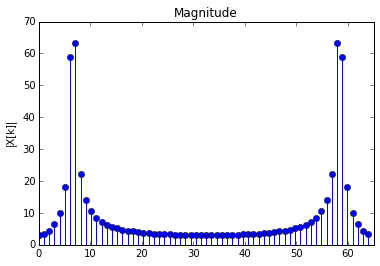

In [10]:
Y3 = dot(M, y3)
stem(x, abs(Y3))
title('Magnitude')
ylabel('|X[k]|')
xlim([0, 65])

### The DFT of Length-M step in $\mathbb{C}^N$

$$x [n] = \sum_{h=0}^{M-1}{\delta [n - h]}, \mbox{   } n = 0,1,\cdots,N-1 $$

The DFT of length-M step in $\mathbb{C}^N$

$$
\begin{equation}
\begin{split}
X[k] & = \sum_{n=0}^{N-1}{e^{-j\frac{2\pi}{N}nk}} =  \sum_{n=0}^{M-1}{e^{-j\frac{2\pi}{N}nk}} \\
& = \frac{1-e^{-j\frac{2\pi}{N}kM}}{1-e^{-j\frac{2\pi}{N}k}} \\
& = \frac{e^{-j\frac{\pi}{N}kM}[e^{j\frac{\pi}{N}kM} - e^{-j\frac{\pi}{N}kM}]}{e^{-j\frac{\pi}{N}k}[e^{j\frac{\pi}{N}k} - e^{-j\frac{\pi}{N}k}]} \\
& = \frac{sin(\frac{\pi}{N}Mk)}{sin(\frac{\pi}{N}k)}e^{-j\frac{\pi}{N}(M-1)k}
\end{split}
\end{equation}
$$

* $X[0] = M$ from the definition of the sum
* $X[k] = 0$ if $Mk/N$ integer ($0 \le k < N$)
* The phase of $X[k]$ linear in $k$ (except at sign changes for the real part)

(0, 2)

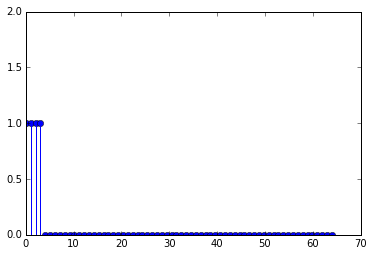

In [11]:
def lengthM(M, L):
    if M >= L: 
        return np.ones(L)
    x = ones(M)
    y = zeros(L-M)
    return concatenate((x,y),axis=0)

YLengthM = lengthM(4, N)
stem(x, YLengthM)
ylim([0,2])

The DFT of the Length-M function is:

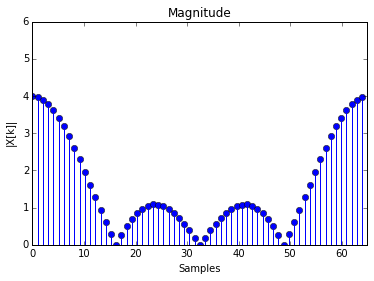

In [12]:
DFTLengthM = dot(M, YLengthM)
stem(x, abs(DFTLengthM))
title('Magnitude')
axis([0,65, 0, 6])
xlabel('Samples')
ylabel('|X[k]|')

### DFT of L periods

We can use the Karplus-Strong formula to generate periodical signal. Remember the KS formula is:

$$y[n] = \alpha*y[n-M] + x[n]$$

By carefully choosing $\alpha$ and $x[n]$ we can genereate periodical signal. For example, we will choose 
* $\bar{x}[n]$ that is nonzero only for $0 \le n < M$. $\bar{x}[n]$ is called support signal, so it has a bar over the variable.
* $\alpha = 1$ (for now)

So the generated signal will be: $$y[n] = \bar{x}[0], \bar{x}[1],\cdots, \bar{x}[M-1], \bar{x}[0], \bar{x}[1],\cdots, \bar{x}[M-1]$$

For example, we have a sawtooth signal:

[0, 32, -2, 2]

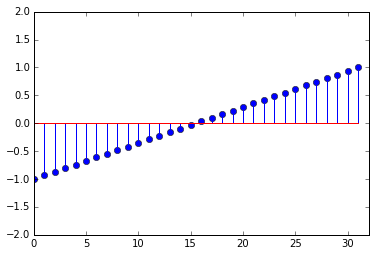

In [13]:
N32 = 32
SawTooth = np.linspace(-1, 1, N32)
stem(SawTooth)
axis([0,32,-2,2])

The DFT of the sawtooth signal has the shape similar to the below graph. Notice that the DFT of signal at 0 is 0 because the sawtooth signal is linear, so they average out at 0.

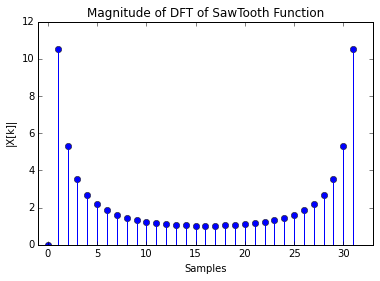

In [14]:
WM32 = dftmatrix(N32)
DFTSawTooth = dot(WM32, SawTooth)
stem(abs(DFTSawTooth))
axis([-1,33,0,12])
title('Magnitude of DFT of SawTooth Function')
xlabel('Samples')
ylabel('|X[k]|')

What if we calculate the DFT of 2 periods of SawTooth Function

[0, 64, -1, 1]

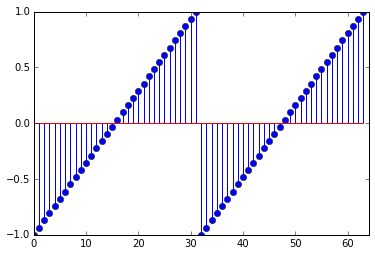

In [15]:
SawTooth2 = concatenate((SawTooth, SawTooth))
stem(SawTooth2)
axis([0,64,-1,1])

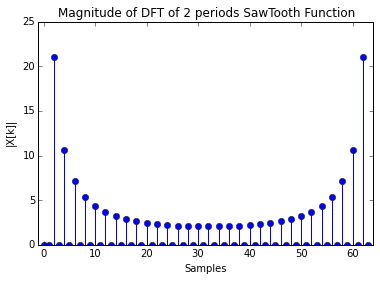

In [16]:
DFTSawTooth2 = dot(M, SawTooth2)
stem(abs(DFTSawTooth2))
axis([-1,64,0,25])
title('Magnitude of DFT of 2 periods SawTooth Function')
xlabel('Samples')
ylabel('|X[k]|')

We can compute the DFT of the above signal as following:

$$
\begin{equation}
\begin{split}
X_L[k] &= \sum_{n=0}^{LM-1}{y[n]e^{-j\frac{2\pi}{LM}nk}}, \mbox{  } k = 0,1,2,\cdots,LM-1 \\
&= \sum_{p=0}^{L-1} \sum_{n=0}^{M-1}y[n+pM]e^{-j\frac{2\pi}{LM}(n+pM)k} \\
&= \sum_{p=0}^{L-1} \sum_{n=0}^{M-1}y[n]e^{-j\frac{2\pi}{LM}nk} e^{-j\frac{2\pi}{L}pk} \\
&= \left( \sum_{p=0}^{L-1}e^{-j\frac{2\pi}{L}pk}\right) \sum_{n=0}^{M-1}\bar{x}[n]e^{-j\frac{2\pi}{LM}nk}
\end{split}
\end{equation}
$$

We've seen this before (in the proof of orthogonality for the DFT basis)


$$
\sum_{p=0}^{L-1}e^{-j\frac{2\pi}{L}pk} = \left\{
\begin{array}{11}
  L & \mbox{if } k \mbox{ multiple of } L \\
  0 & \mbox{otherwise }
\end{array}
\right.
$$

So 

$$
X_L[k] = \left\{ \begin{array}{11} 
L\bar{X}[k/L] & \mbox{if } k = 0,L,2L,3L,\cdots \\
0 & \mbox{otherwise}
\end{array}\right.
$$

## DTFT (Discrete-Time Fourier Transform)

Formal definition:

* $x[n] \in l_2(\mathbb{Z})$
* Define the function of $\omega \in \mathbb{R}$
$$ F(\omega) = \sum_{n=-\infty}^{\infty}x[n]e^{-j\omega n}$$
* Inversion (when $F(\omega)$ exists):
$$ x[n] = \frac{1}{2\pi}\int_{-\pi}^{\pi}F(\omega)e^{j\omega n}d\omega , \mbox{   } n \in \mathbb{Z} $$

DTFT periodicity and notation:
* $F(\omega)$ is $2\pi$-periodic
* To stress periodicity (and for other reasons) we will write:

$$ X(e^{j\omega}) = \sum_{n=-\infty}^{\infty}x[n]e^{-j\omega n} $$
* By convention, $X(e^{j\omega})$ is represented over $[-\pi, \pi]$

### DTFT of $x[n] = \alpha^n u[n], \mbox{ } |\alpha| < 1 $

By definition we have

$$
\begin{equation}
\begin{split}
X(e^{j\omega}) &= \sum_{n=-\infty}^{\infty}x[n]e^{-j\omega n} \\
&= \sum_{n=0}^{\infty}\alpha^n e^{-j \omega n} \\
&= \sum_{n=0}^{\infty}(\alpha e^{-j\omega})^n \\
&= \frac{1}{1 - \alpha e^{-j \omega}}
\end{split}
\end{equation}
$$

The magnitude of X is:

$$ 
|X(e^{j\omega})|^2 = \frac{1}{1 + \alpha^2 - 2\alpha cos\omega}
$$

<Container object of 3 artists>

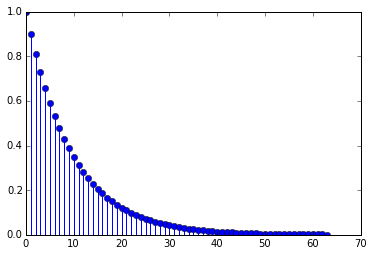

In [17]:
alpha = 0.9
YKarplusStrong = alpha**arange(N)
stem(YKarplusStrong)

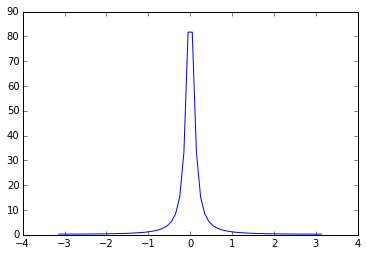

In [18]:
DFTYKarplusStrong = vectorize(
    lambda x: 1. / (1+ alpha**2 - 2 * alpha * cos(x)))
x = linspace(-pi, pi, 64)
plot(x, abs(DFTYKarplusStrong(x)))

### DTFT for Karplus-String, in which support signal is a 32-tap sawtooth

The support signal will be:

$x[n] = \frac{2n}{M-1}-1,n = 0,1,\cdots,M-1 $

[0, 32, -2, 2]

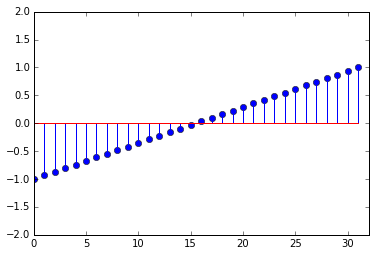

In [19]:
M32 = 32
x = 2*np.arange(M32)/(M32-1) - 1
stem(x)
axis([0, 32, -2, 2])

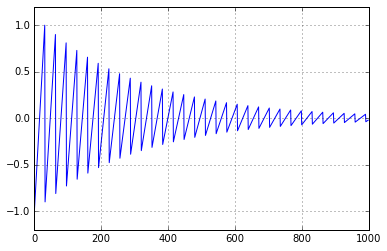

In [20]:
NumberOfSamples = 1000
n = arange(NumberOfSamples)
Y = lambda alpha, n, M: alpha**floor(n/M)*x[n % M]
plot(n, Y(0.9, n, 32))
axis([-2, 1000, -1.2, 1.2])
grid()

The DTFT of the sawtooth signal defined above can be calculated

$$
\begin{equation} \begin{split}
Y(e^{j\omega}) &= \sum_{n=\infty}^{\infty} y[n] e^{-j\omega n} \\
&= \sum_{p=0}^{\infty} \sum_{n=0}^{M-1} \alpha^p \bar{x}[n] e^{-j\omega(pM+n)} \\
&= \sum_{p=0}^{\infty} \alpha^p e^{-j\omega Mp} \sum_{p=0}^{M}\bar{x}[n]e^{-j\omega n} \\
&= A(e^{j\omega M}) \bar{X}(e^{j\omega})
\end{split}
\end{equation}
$$

We calculated the first term $(e^{j\omega M})$. It's DTFT of $x[n] = \alpha^n u[n], \mbox{ } |\alpha| < 1 $. $A(e^{j\omega M})$ rescales the frequency axis: **periodicity**.

Second term
$$
\bar{X}(e^{j\omega}) = e^{-j\omega}\left(\frac{M+1}{M-1}\right) \frac{1-e^{-j(M-1)\omega}}{(1-e^{-j\omega})^2} - \frac{1 - e^{-j(M+1)\omega}}{(1-e^{-j\omega})^2}
$$

### DTFT properties

* Linearity
$$ DTFT\{\alpha x[n] + \beta y[n]\} = \alpha X(e^{j\omega}) + \beta Y(e^{j\omega})$$
* Time shift
$$ DTFT\{ x[n-M] \} = e^{-j\omega M}X(e^{j\omega}))$$
* modulation (dual)
$$ DTFT\{ e^{j\omega_{0}n}x[n]\} = X(e^{j(\omega - \omega_{0})}) $$
* Time reversal
$$ DTFT{x[-n]} = X(e^{-j\omega}) $$
* Conjugation
$$ DTFT{x^*[n]} = X^*(e^{-j\omega}) $$

### Some particular cases

* If $x[n]$ is symmetric, the DTFT is symmetric:
$$ x[n] = x[-n] \Leftrightarrow X(e^{j\omega}) = X(e^{-j\omega}) $$
* If $x[n]$ is real, the DTFT is Hermitian-symmetric:
$$ x[n] = x^*[n] \Leftrightarrow X(e^{j\omega}) = X^*(e^{-j\omega}) $$
* Special case: if $x[n]$ is real, the magnitude of the DTFT is symmetric:
$$ x[n] \in \mathbb{R} \Rightarrow |X(e^{j\omega})| = |X(e^{-j\omega})| $$
* if $x[n]$ is real and symmetric, $X(e^{j\omega})$ is also real and symmetric

## The Dirac Delta Function

Problem: Too many interesting sequences are not square summable.

Defined by the "sifting" property

$$
\int_{-\infty}^{\infty} \delta(t-s)f(t)dt = f(s)
$$
For all function of $t \in \mathbb{R}$

### Intuition

* Family of localizing functions $r_k(t)$ with $k \in \mathbb{N}$ and $t \in \mathbb{R}$
* support inversly proportional to $k$
* constanst area

Example **rect** function

$$
rect(t) = \left\{ \begin{array}{11}
1 & \mbox{for } |t| < 1/2 \\
0 & otherwise
\end{array} \right.
$$

Consider the localizing family $r_k(t) = k*rect(kt)$:
* Non-zero over $\left[\frac{-1}{2k}, \frac{1}{2k}\right]$
* Area is 1

### Extracting a point value

By the Mean Value Theorem

$$
\int_{-\infty}^{\infty} r_k(t)f(t)dt = k\int_{-1/2k}^{1/1k} f(t)dt = f(\gamma)|_{\gamma \in [-1/2k, 1/2k]}
$$

an so:

$$
\lim_{k\to\infty}\int_{-\infty}^{\infty} r_k(t)f(t)dt = f(0)
$$

### The "pulse train"

$$
\tilde{\delta}(\omega) = 2\pi\sum_{k=-\infty}^{\infty}\delta(\omega - 2\pi k)
$$

Just a technicality to use the Dirac delta in the space of $2\pi$-periodic functions.

$$
\begin{equation}
\begin{split}
IDTFT\{\tilde{\delta}(\omega)\} &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \tilde{\delta}(\omega)e^{j\omega n}dn \\
&= \int_{-\pi}^{\pi} \delta(\omega)e^{j\omega n}dn \\
&= e^{j\omega n}|_{w=0} \\
&= 1
\end{split}
\end{equation}
$$

Partial DTFT sum:

$$
S_k(\omega) = \sum_{n=-k}^{k} e^{-j\omega n}
$$

Using the same technique, we have

$$
IDTFT\left\{ \tilde{\delta}(\omega - \omega_0) \right\} = e^{j\omega_0 n}
$$

So:
* $DTFT\{1\} = \tilde{\delta}(\omega)$
* $DTFT\{e^{j\omega_0 n}\} = \tilde{\delta}(\omega - \omega_0)$
* $DTFT\{cos\omega_0 n\} = [\tilde{\delta}(\omega - \omega_0) + \tilde{\delta}(\omega + \omega_0]/2$
* $DTFT\{sin\omega_0 n\} = -j[\tilde{\delta}(\omega - \omega_0) - \tilde{\delta}(\omega + \omega_0]/2$

<function __main__.<lambda>>

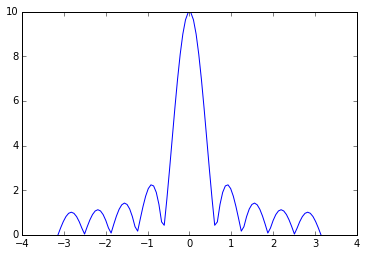

In [22]:
from IPython.html.widgets import interact, IntSliderWidget

S_k = np.vectorize(lambda omega, k: 
                   sum(exp(-1j*arange(-k, k)*omega)),
                   excluded=['k'])
omega_range = linspace(-pi, pi, 100)
plotSk = lambda k: plot(omega_range, abs(S_k(omega_range, k)))
interact(plotSk, k=IntSliderWidget(min=1, max=20, step=1, value=5))

## Relationship between transforms

* DFT, DFS change of basis in $\mathbb{C}^N$. Basis vectors are "building blocks" for any signal. DFT is computable.
* DTFT formal change of basis in $l_2(\mathbb{Z})$, a mathematical tool.

Embedding finite-length signals
* N-tap signal $x[n]$.
* natural spectral representation: DFT $X[k]$.
* 2 ways to embed $x[n]$ into an infinite sequence:
    + periodic extension: $\tilde{x}[n] = x[n \mbox{ mod } N]$
    + finite-support extension: $\bar{x}[n] = \left\{ \begin{array}{11}
        x[n] & 0 \le n < N \\
        0 & otherwise \end{array} \right. $
       

### DTFT of periodic signals

$$\tilde{x}[n] = x[n \mbox{ mod } N]$$

$$
\begin{equation}
\begin{split}
\tilde{X}(e^{j\omega}) &= \sum_{n=-\infty}^{\infty}\tilde{x}[n]e^{-j\omega n} \\
&= \sum_{n=-\infty}^{\infty}\left( \frac{1}{N} \sum_{k=0}^{N-1}\tilde{X}[k]e^{j\frac{2\pi}{N}nk} \right) e^{-j\omega n} \\
&= \frac{1}{N} \sum_{k=0}^{N-1}X[k] \left( \sum_{n=-\infty}^{\infty}e^{j\frac{2\pi}{N}nk}e^{-j\omega n} \right)
\end{split}
\end{equation}
$$

We've seen this before

$$
\begin{equation}
\begin{split}
\sum_{n=-\infty}^{\infty}e^{j\frac{2\pi}{N}nk}e^{-j\omega n} &= DTFT \left\{ e^{j\frac{2\pi}{N}nk} \right\} \\
&= \tilde{\delta}(\omega - \frac{2\pi}{N}k)
\end{split}
\end{equation}
$$

therefore

$$
\tilde{X}(e^{j\omega}) = \frac{1}{N}\sum_{k=0}^{N-1}X[k] \tilde{\delta}(\omega - \frac{2\pi}{N}k)
$$

### DTFT of finite-support signals

$$\bar{x}[n] = \left\{ \begin{array}{11} 
x[n] & 0 \le n < N \\
0 & otherwise
\end{array}\right.
$$

$$\begin{equation}
\begin{split}
\tilde{X}(e^{j\omega}) &= \sum_{n=-\infty}^{\infty}\bar{x}[n]e^{-j\omega n} = \sum_{n=0}^{N-1}\bar{x}[n]e^{-j\omega n} \\
&= \sum_{n=0}^{N-1} \left( \frac{1}{N} \sum_{k=0}^{N-1}X[k]e^{j\frac{2\pi}{N}nk} \right) e^{-j\omega n} \\
&= \frac{1}{N} \sum_{k=0}^{N-1} X[k] \left( \sum_{n=0}^{N-1} e^{-j(\omega - \frac{2\pi}{N}k)n} \right)
\end{split}
\end{equation}
$$

$$
\sum_{n=0}^{N-1} e^{-j(\omega - \frac{2\pi}{N}k)n} = \bar{R}(e^{j(\omega-\frac{2\pi}{N}k)})
$$

where $\bar{R}(e^{j\omega})$ is the DTFT of $\bar{r}[n]$, the interval indicator signal:

$$
\bar{r}[n] = \left\{ \begin{array}{11}
1 & 0 \le n < N \\
0 & otherwise
\end{array}\right.
$$

[-10, 10, 0, 2]

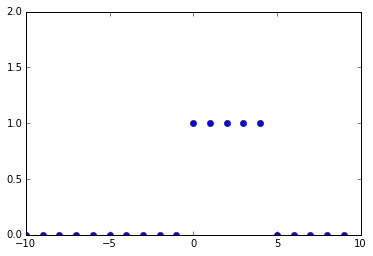

In [24]:
def interval_indicator_fun(N, r):
    if r < N: 
        raise ValueError("Range must be greater than the interval")
    low = np.zeros(r)
    high = np.concatenate((np.ones(N), np.zeros(r-N)))
    return np.concatenate((low, high))

yint = interval_indicator_fun(5, 10)
xint = np.arange(-10, 10)
plt.plot(xint, yint, 'o')
plt.axis([-10, 10, 0, 2])

### DTFT of interval signal

$$
\begin{equation}\begin{split}
\bar{R}(e^{j\omega}) &= \sum_{n=0}^{N-1}e^{-j\omega n} \\
&= \frac{1-e^{-j\omega N}}{1-e^{-j\omega}} \\
&= \frac{e^{-j\frac{\omega N}{2}}\left[ e^{j\frac{\omega N}{2}} - e^{-j\frac{\omega N}{2}}\right]}{e^{-j\frac{\omega}{2}}\left[ e^{j\frac{\omega}{2}} - e^{-j\frac{\omega}{2}}\right]} \\
&= \frac{sin(\frac{\omega}{2}N)}{sin(\frac{\omega}{2})} e^{-j\frac{\omega}{2}(N-1)}
\end{split}\end{equation}
$$

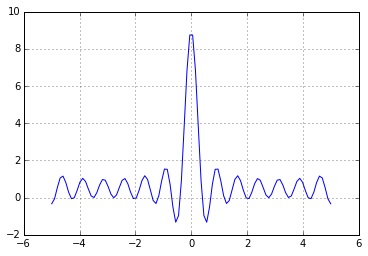

In [23]:
plot_range = linspace(-5, 5, 100)
def Rdtft(omega, N):
    return sin(omega/2*N)/sin(omega/2)*exp(-1j*omega/2*(N-1))
plotRdtft = lambda k: plot(plot_range, Rdtft(plot_range, k).real)
interact(plotRdtft, k=IntSliderWidget(min=1, max=20, step=1, value=9))
grid()

So we can finish the calculation of the DTFT of finite-support signals

$$
\bar{X}(e^{j\omega}) = \sum_{k=0}^{N-1}X[k]\Lambda(\omega - \frac{2\pi}{N}k)
$$

with $\Lambda(\omega) = (1/N)\bar{R}(e^{j\omega})$ smooth interpolation of DFT values.

### About zero-padding

when computing the DFT numerically one may "pad" the data vector with 0 to obtain a smoother plot.

zero padding does not add information
a zero-padded DFT is samply a sampled DTFT of the finite support extension

## Sinusoidal modulation

3 categories of signal where most of the spectral energy resides:
* **lowpass signals** (baseband signals)
* **highpass signals**
* **bandpass signals**.

### sinusoidal modulation

$$
DTFT \left\{ x[n]cos(\omega_c n) \right\} = DTFT \left\{ \frac{1}{2}e^{j\omega_c n}x[n] + \frac{1}{2}e^{-j\omega_c n}x[n] \right\} = \frac{1}{2} \left[ X(e^{j(\omega - \omega_c)} + X(e^{j(\omega + \omega_c)}) \right]
$$

* usually $x[n]$ **baseband**
* $\omega_c$ is the **carrier frequency**

The spectrum is moved to frequency $-\omega_c$ and $\omega_c$

### applications

* voice and music are lowpass signals
* radio channels are bandpass, in much higher frequencies
* modulation brings the baseband signal in the tranmission band
* demodulation at the receiver brings it back

## Sinusoidal demodulation

Just multiply the received signal by the carrier again

$$y[n] = x[n] cos(\omega_cn)$$
$$ Y(e^{j\omega}) = \frac{1}{2} \left[ X(e^{j(\omega - \omega_c)}) + X(e^{j(\omega + \omega_c)}) \right]$$

$$ \begin{equation} \begin{split}
DTFT { y[n].2cos(\omega_cn) } &= Y(e^{j(\omega - \omega_c)}) + Y(e^{j(\omega + \omega_c)}) \\
&= \frac{1}{2} \left[ X(e^{j(\omega - 2\omega_c)}) + X(e^{j\omega)}) + X(e^{j(\omega + 2\omega_c)}) + X(e^{j\omega)}) \right] \\
&= X(e^{j\omega)}) + \frac{1}{2} \left[ X(e^{j(\omega - 2\omega_c)}) + X(e^{j(\omega + 2\omega_c)}) \right]
\end{split}
\end{equation}
$$

### Tuning a guitar

Problem (abstraction):
* reference sinusoid at frequency $\omega_0$
* tunable sinusoid of frequency $\omega$
* tune by ears $\omega = \omega_0$

Procedure

1. bring $\omega$ clost to $\omega_0$
2. when $\omega \approx \omega_0$ play both sinusoids together
3. Trigonometry comes to the rescue:

$$\begin{equation}\begin{split}
x[n] &= cos(\omega_0 n) + cos(\omega n) \\
&= 2cos(\frac{\omega_0 + \omega}{2}n)cos(\frac{\omega_0 - \omega}{2}n) \\
&\approx 2cos(\Delta_\omega n)cos(\omega_0 n)
\end{split}
\end{equation}
$$

* error signal: $2cos(\Delta_\omega n)$
* modulation at $\omega_0$
